## 12.1. 모델
- k-NN(k-Nearest Neighbors, k-근접이웃)
>- 거리를 재는 방법  
>- 서로 가까운 점들은 유사하다는 가정

In [42]:
from collections import Counter
import statsmodels.api as sm
#from linear_algebra import distance #해당 라이브러리를 받을 수 없음. 
from scipy import stats
#from stats import mean
import math, random
import matplotlib.pyplot as plt

In [43]:
def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    #most_common은 counter형 데이터에서 최빈값인 것들을 ()안의 숫자만큼 반환한다.
    #ex)[(1, 5), (2, 3), (3, 3)] #(숫자, n번)
    #winner로 가장 먼저 나온 숫자를 받는다. 
    return winner

In [ ]:
#여러 1등 중 임의로 하나를 설정한다.
#거리를 가중치로 사용해 거리 기반 투표를 한다. 
#단독 1등이 생길 대까지 k를 하나씩 줄인다.

In [44]:
def majority_vote(labels):
    '''labels는 가장 가까운 데이터부터 가장 먼 데이터 순서로 정렬되어 있다고 가정'''
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    #winner count = 최빈값
    num_winners = len([count
                      for count in vote_counts.values()
                      if count == winner_count])
    if num_winners == 1:
        return winner  # 1등이 하나이기 때문에 반환
    else:
        return majority_vote(labels[:-1])  # 가장 먼 데이터를 제외하고 다시 찾아봄

In [ ]:
test=[1,2,3,5,6]
test[:-1]

In [45]:
def knn_classify(k, labeled_points, new_point):
    '''각 labeled_points는 (데이터 포인트, 레이블) 쌍으로 구성되어 있음'''
    
    # labeled_points를 가장 가까운 데이터부터 가장 먼 데이터 순서로 정렬
    #distance함수 작성된 부분 없음
    by_distance = sorted(labeled_points, 
                         key=lambda point_label: distance(point_label[0], new_point))
    
    # 가장 가까운 k 데이터 포인트의 레이블을 살펴보고
    k_nearest_labels = [label for _, label in by_distance[:k]]
    
    # 투표를 함
    return majority_vote(k_nearest_labels)

In [22]:
sorted([4,3,5,6,2])#오름차순 정렬

[2, 3, 4, 5, 6]

In [23]:
def hap(x,y):
    return x+y  
hap(1,2)

3

In [24]:
(lambda x,y:x+y)(1,2)

3

## 12.2. 예시: 가장 인기 있는 프로그래밍 언어

In [25]:
# 각 데이터는 ([경도, 위도], 선호하는 프로그래밍 언어) 형태로 구성되어 있음

cities = [(-86.75,33.5666666666667,'Python'),(-88.25,30.6833333333333,'Python'),(-112.016666666667,33.4333333333333,'Java'),(-110.933333333333,32.1166666666667,'Java'),(-92.2333333333333,34.7333333333333,'R'),(-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),(-118.233333333333,34.05,'Java'),(-122.316666666667,37.8166666666667,'R'),(-117.6,34.05,'Python'),(-116.533333333333,33.8166666666667,'Python'),(-121.5,38.5166666666667,'R'),(-117.166666666667,32.7333333333333,'R'),(-122.383333333333,37.6166666666667,'R'),(-121.933333333333,37.3666666666667,'R'),(-122.016666666667,36.9833333333333,'Python'),(-104.716666666667,38.8166666666667,'Python'),(-104.866666666667,39.75,'Python'),(-72.65,41.7333333333333,'R'),(-75.6,39.6666666666667,'Python'),(-77.0333333333333,38.85,'Python'),(-80.2666666666667,25.8,'Java'),(-81.3833333333333,28.55,'Java'),(-82.5333333333333,27.9666666666667,'Java'),(-84.4333333333333,33.65,'Python'),(-116.216666666667,43.5666666666667,'Python'),(-87.75,41.7833333333333,'Java'),(-86.2833333333333,39.7333333333333,'Java'),(-93.65,41.5333333333333,'Java'),(-97.4166666666667,37.65,'Java'),(-85.7333333333333,38.1833333333333,'Python'),(-90.25,29.9833333333333,'Java'),(-70.3166666666667,43.65,'R'),(-76.6666666666667,39.1833333333333,'R'),(-71.0333333333333,42.3666666666667,'R'),(-72.5333333333333,42.2,'R'),(-83.0166666666667,42.4166666666667,'Python'),(-84.6,42.7833333333333,'Python'),(-93.2166666666667,44.8833333333333,'Python'),(-90.0833333333333,32.3166666666667,'Java'),(-94.5833333333333,39.1166666666667,'Java'),(-90.3833333333333,38.75,'Python'),(-108.533333333333,45.8,'Python'),(-95.9,41.3,'Python'),(-115.166666666667,36.0833333333333,'Java'),(-71.4333333333333,42.9333333333333,'R'),(-74.1666666666667,40.7,'R'),(-106.616666666667,35.05,'Python'),(-78.7333333333333,42.9333333333333,'R'),(-73.9666666666667,40.7833333333333,'R'),(-80.9333333333333,35.2166666666667,'Python'),(-78.7833333333333,35.8666666666667,'Python'),(-100.75,46.7666666666667,'Java'),(-84.5166666666667,39.15,'Java'),(-81.85,41.4,'Java'),(-82.8833333333333,40,'Java'),(-97.6,35.4,'Python'),(-122.666666666667,45.5333333333333,'Python'),(-75.25,39.8833333333333,'Python'),(-80.2166666666667,40.5,'Python'),(-71.4333333333333,41.7333333333333,'R'),(-81.1166666666667,33.95,'R'),(-96.7333333333333,43.5666666666667,'Python'),(-90,35.05,'R'),(-86.6833333333333,36.1166666666667,'R'),(-97.7,30.3,'Python'),(-96.85,32.85,'Java'),(-95.35,29.9666666666667,'Java'),(-98.4666666666667,29.5333333333333,'Java'),(-111.966666666667,40.7666666666667,'Python'),(-73.15,44.4666666666667,'R'),(-77.3333333333333,37.5,'Python'),(-122.3,47.5333333333333,'Python'),(-89.3333333333333,43.1333333333333,'R'),(-104.816666666667,41.15,'Java')]
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]

In [26]:
cities[:5]

[([-86.75, 33.5666666666667], 'Python'),
 ([-88.25, 30.6833333333333], 'Python'),
 ([-112.016666666667, 33.4333333333333], 'Java'),
 ([-110.933333333333, 32.1166666666667], 'Java'),
 ([-92.2333333333333, 34.7333333333333], 'R')]

In [27]:
def plot_state_borders(plt, color='0.8'):
    pass

In [ ]:
#plot_state_borders
#불가 states.txt파일 없음 
"""
1.검색엔진에서 state boundaries latitude longitude(미국 주 경계 위경도)같은 쿼리로 검색
2.가지고 있는 데이터를 [(경도1,위도1),(경도2,위도2)]등의 형태로 변환한다.
3.plt.plot(을 이용해 지도를 그린다.)
"""
import re
import matplotlib.pyplot as plt

segments = []
points = []

lat_long_regex = r"<point lat=\"(.*)\" lng=\"(.*)\""

with open("states.txt", "r") as f:
    lines = [line for line in f]

for line in lines:
    if line.startswith("</state>"):
        for p1, p2 in zip(points, points[1:]):
            segments.append((p1, p2))
        points = []
    s = re.search(lat_long_regex, line)
    if s:
        lat, lon = s.groups()
        points.append((float(lon), float(lat)))

def plot_state_borders(color='0.8'):
    for (lon1, lat1), (lon2, lat2) in segments:
        plt.plot([lon1, lon2], [lat1, lat2], color=color)
    

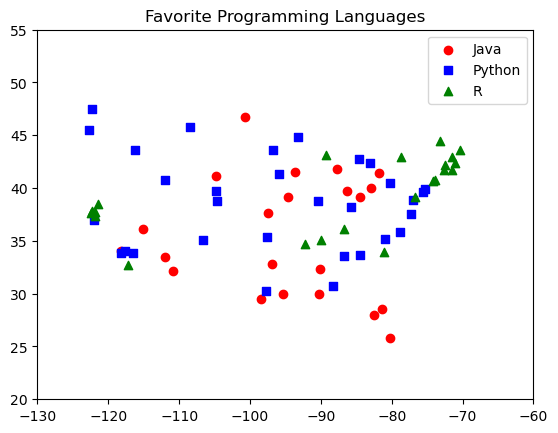

In [38]:
# 프로그래밍 언어가 키(key), (경도, 위도) 쌍이 값
plots = {'Java' : ([], []), 'Python' : ([], []), 'R' : ([], [])}

# 각 프로그래밍 언어마다 색깔과 마커(marker)가 다름
markers = {'Java' : 'o', 'Python' : 's', 'R' : '^'}
colors = {'Java' : 'r', 'Python' : 'b', 'R' : 'g'}

for(longitude, latitude), language in cities:
    plots[language][0].append(longitude)
    plots[language][1].append(latitude)

# 각 프로그래밍 언어마다 데이터 포인트를 뿌림
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                label=language, zorder=10)
    
plot_state_borders(plt)  # 주 경계선을 그려 주는 함수가 있다고 하자

plt.legend(loc=0)  # matplotlib가 알아서 위치를 설정
plt.axis([-130, -60, 20, 55])  # 축 설정

plt.title('Favorite Programming Languages')
plt.show()
#현재 데이터는 미국 지도를 두고 그려져야 한다. 
#현재 데이터를 기준으로 인접한 지역기리 비슷한 언어를 좋아하는 경향을 보인다고 함.

In [35]:
for(longitude, latitude), language in cities:
    print((longitude, latitude), language)
    break

(-86.75, 33.5666666666667) Python


In [33]:
plots['Java']

([-112.016666666667,
  -110.933333333333,
  -118.233333333333,
  -80.2666666666667,
  -81.3833333333333,
  -82.5333333333333,
  -87.75,
  -86.2833333333333,
  -93.65,
  -97.4166666666667,
  -90.25,
  -90.0833333333333,
  -94.5833333333333,
  -115.166666666667,
  -100.75,
  -84.5166666666667,
  -81.85,
  -82.8833333333333,
  -96.85,
  -95.35,
  -98.4666666666667,
  -104.816666666667],
 [33.4333333333333,
  32.1166666666667,
  34.05,
  25.8,
  28.55,
  27.9666666666667,
  41.7833333333333,
  39.7333333333333,
  41.5333333333333,
  37.65,
  29.9833333333333,
  32.3166666666667,
  39.1166666666667,
  36.0833333333333,
  46.7666666666667,
  39.15,
  41.4,
  40,
  32.85,
  29.9666666666667,
  29.5333333333333,
  41.15])

In [ ]:
#현재 기준 knn_classify함수에서 distance 메소드를 사용할 수 없어 오류남

In [24]:
def random_point(dim):
    return [random.random() for _ in range(dim)]

def random_distances(dim, num_pairs):
    return [distance(random_point(dim), random_point(dim))
            for _ in range(num_pairs)]


if __name__ == "__main__":
#이웃 도시들을 통해 해당 도시의 선호 언어를 추정하는 방법이 얼마나 좋은지 확인
#다양한 k값에 대해 시도
    # try several different values for k
    for k in [1, 3, 5, 7]:
        num_correct = 0

        for location, actual_language in cities:

            other_cities = [other_city
                            for other_city in cities
                            if other_city != (location, actual_language)]

            predicted_language = knn_classify(k, other_cities, location)

            if predicted_language == actual_language:
                num_correct += 1

        print(k, "neighbor[s]:", num_correct, "correct out of", len(cities))

    dimensions = range(1, 101, 5)

    avg_distances = []
    min_distances = []

    random.seed(0)
    for dim in dimensions:
        distances = random_distances(dim, 10000)  # 10,000 random pairs
        avg_distances.append(mean(distances))     # track the average
        min_distances.append(min(distances))      # track the minimum
        print(dim, min(distances), mean(distances), min(distances) / mean(distances))

1 neighbor[s]: 40 correct out of 75
3 neighbor[s]: 44 correct out of 75
5 neighbor[s]: 41 correct out of 75
7 neighbor[s]: 35 correct out of 75
1 7.947421226228712e-06 0.3310009902894413 2.4010264196729895e-05
6 0.18647467260473205 0.9677679968196268 0.19268530600055306
11 0.315888574043911 1.3334395796543002 0.23689755341281116
16 0.7209190490469604 1.6154152410436047 0.4462747600308797
21 0.9694045860570238 1.8574960773724116 0.5218878240800003
26 1.1698067560262715 2.0632214700056446 0.5669807013122402
31 1.2930748713962408 2.257299829279505 0.5728414340991512
36 1.5123637311959328 2.437670913316559 0.620413413038717
41 1.5514668006745476 2.6039686964057926 0.5958085451703037
46 1.6688006850159558 2.756796053135482 0.6053406392242623
51 2.0135369208019926 2.902997336534375 0.6936061895274667
56 2.1422705294432887 3.0461953095695335 0.7032610557548324
61 2.2891825062886793 3.1783717877656223 0.720237486092828
66 2.3805561409678484 3.305579571524835 0.7201630121006946
71 2.42835581674

In [48]:
#3개의 근접이웃을 봤을 때 (k=3)일 때 성능이 59%로 가장 좋다.
44/75

0.5866666666666667

## 12.3. 차원의 저주
- k-NN은 '차원의 저주(curse of dimensionality)'라는 것 때문에 고차원에서 문제가 생긴다. 이것은 데이터가 고차원이라는 것은 다루는 공간이 엄청나게 크다는 것을 의미하며, 그 때문에 데이터 포인트들은 서로 '근접'하지 않게 된다.

In [2]:
def random_point(dim):
    return [random.random() for _ in range(dim)]

In [3]:
#두 점 사이의 거리 재기
def random_distances(dim, num_pairs):
    return [distance(random_point(dim), random_point(dim))
           for _ in range(num_pairs)]

In [ ]:
#1차원부터 100차원까지 각 차원에 대해 총 10000개의 거리를 계산한 뒤 
#각 점들간 평균거리와 최소거리를 구한다.
dimensions=range(1,101)

avg_distances=[]
min_distances=[]
random.seed(0)
for dim in dimensions:
    distances = random_distances(dim, 10000)#10000개의 임의의 쌍
    avg_distances.append(mean(distances)) #평균거리와
    min_distances.append(min(distances)) #최소거리 저장

In [ ]:
#차원이 증가할수록 점들 간 평균 거리도 증가하지만 더 큰 문제는 최근접거리와 평균 거리의 비율이다. 

## 12.4. 더 공부해 보고 싶다면
- scikit-learn은 다양한 근접이웃 모델을 확인할 수 있다.